In [44]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn import pipeline  ,ensemble 
from sklearn.pipeline import Pipeline 
from sklearn import impute
from sklearn import compose
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix,roc_auc_score
from sklearn import set_config
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer,PowerTransformer,QuantileTransformer, RobustScaler,StandardScaler,LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.tree          import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression    
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier

#!pip install xgboost
from xgboost               import XGBClassifier
#!pip install lightgbm
from lightgbm              import LGBMClassifier
#!pip install catboost
from catboost              import CatBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram') # Useful for display the pipeline
print("Pandas  ", pd.__version__)
print("Sklearn ", sklearn.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [45]:
df = pd.read_csv('./heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
df_train=df.iloc[:250,:]
df_test=df.iloc[250:,:].drop('target',axis=1)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

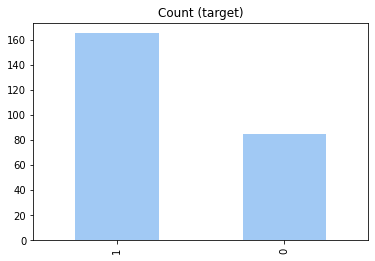

In [47]:
df_train['target'].value_counts().plot(kind='bar', title='Count (target)');

In [48]:
print(f"Train data Describe \n{df_train.describe()}\n")

Train data Describe 
              age         sex          cp    trestbps        chol         fbs  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    54.080000    0.660000    1.072000  131.392000  247.524000    0.140000   
std      9.381773    0.474659    1.015352   17.399116   52.623096    0.347683   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.250000    0.000000   
50%     54.500000    1.000000    1.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

         restecg     thalach       exang     oldpeak       slope          ca  \
count  250.00000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean     0.50400  152.472000    0.276000    0.944800    1.436000    0.628000   
std      

In [49]:
df_train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
        'exr_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [50]:
cat_vars = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exr_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
num_vars = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']

In [51]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [52]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

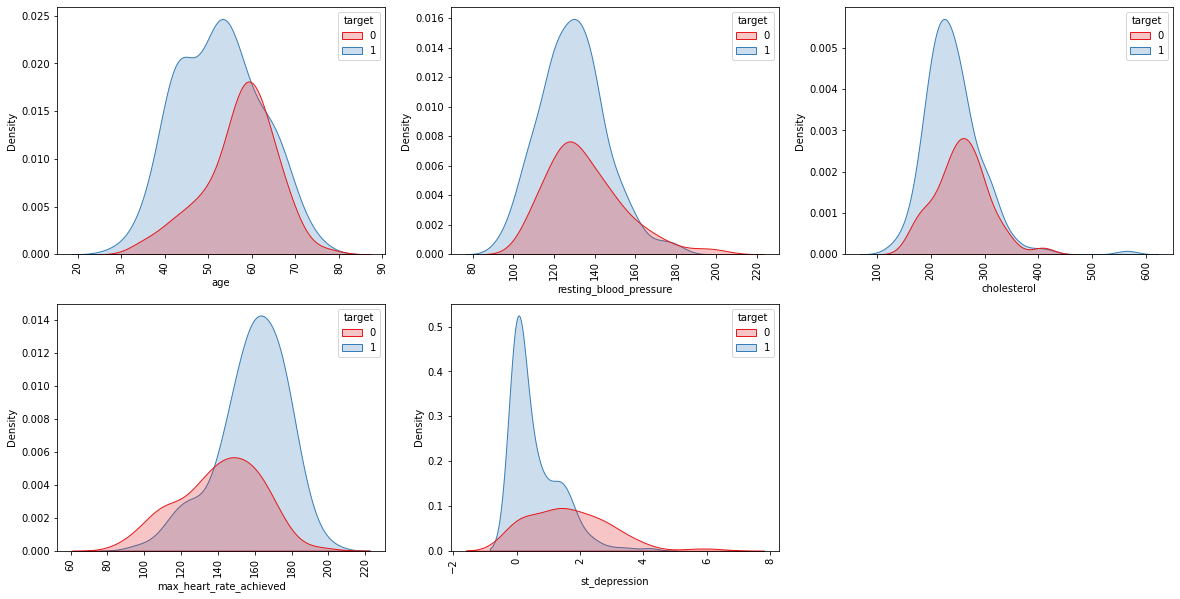

In [53]:
plt.figure(figsize=(20,10))
for i, col in enumerate(num_vars):
    plt.subplot(2,3, i+1)
    sns.kdeplot(data = df_train, x= col,hue = 'target', palette = 'Set1', fill = True)
    plt.xticks(rotation = 90)

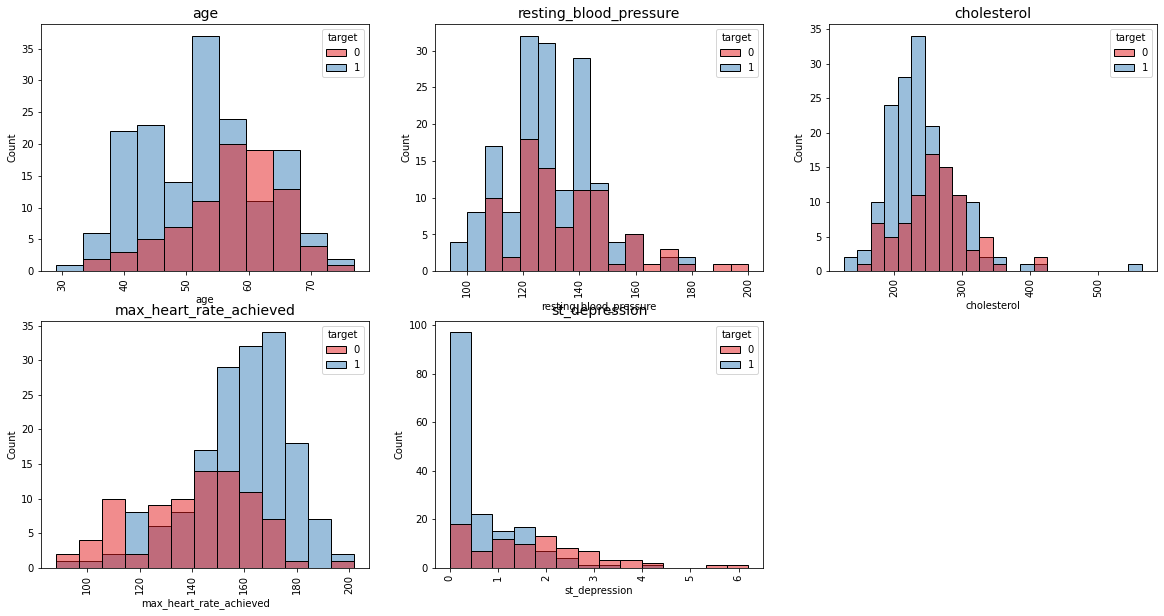

In [54]:
sns.set_palette("pastel")
plt.figure(figsize=(20,10))
for i, col in enumerate(num_vars):
    plt.subplot(2,3, i+1)
    sns.histplot(data = df_train, x = col, hue = 'target', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

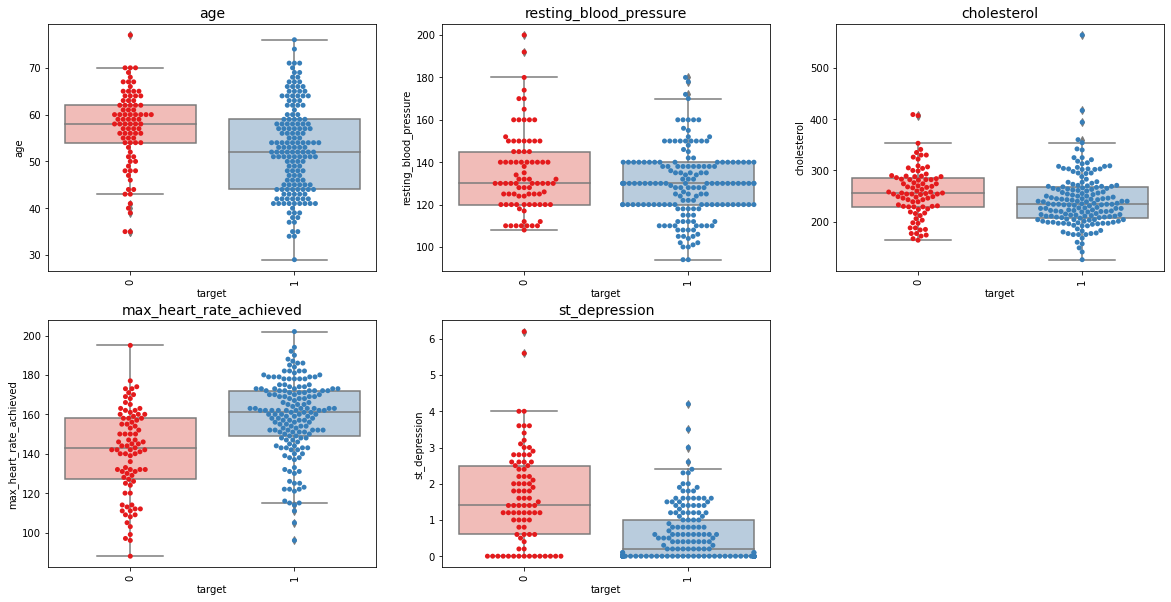

In [55]:
# sns.set_palette("pastel")
plt.figure(figsize=(20,10))
for i, col in enumerate(num_vars):
    plt.subplot(2,3, i+1)
    sns.boxplot(data = df_train, x = 'target', y = col, palette = 'Pastel1' )
    sns.swarmplot(data = df_train, x = 'target', y = col, palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

# categorical feature analysis

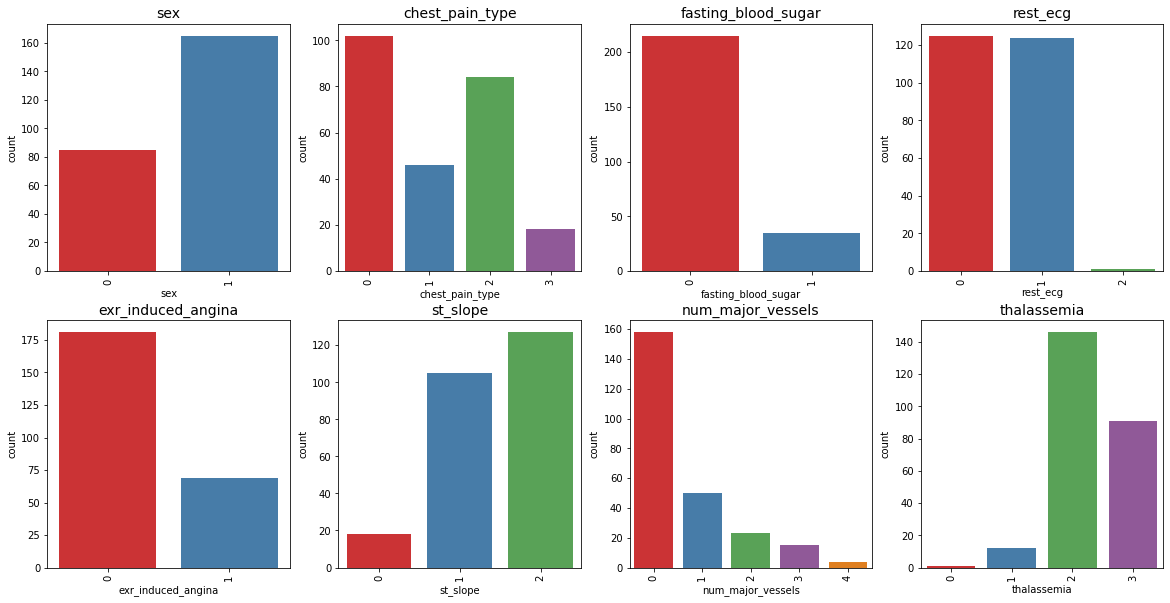

In [56]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cat_vars):
    plt.subplot(2,4, i+1)
    sns.countplot(data = df_train, x = col, palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

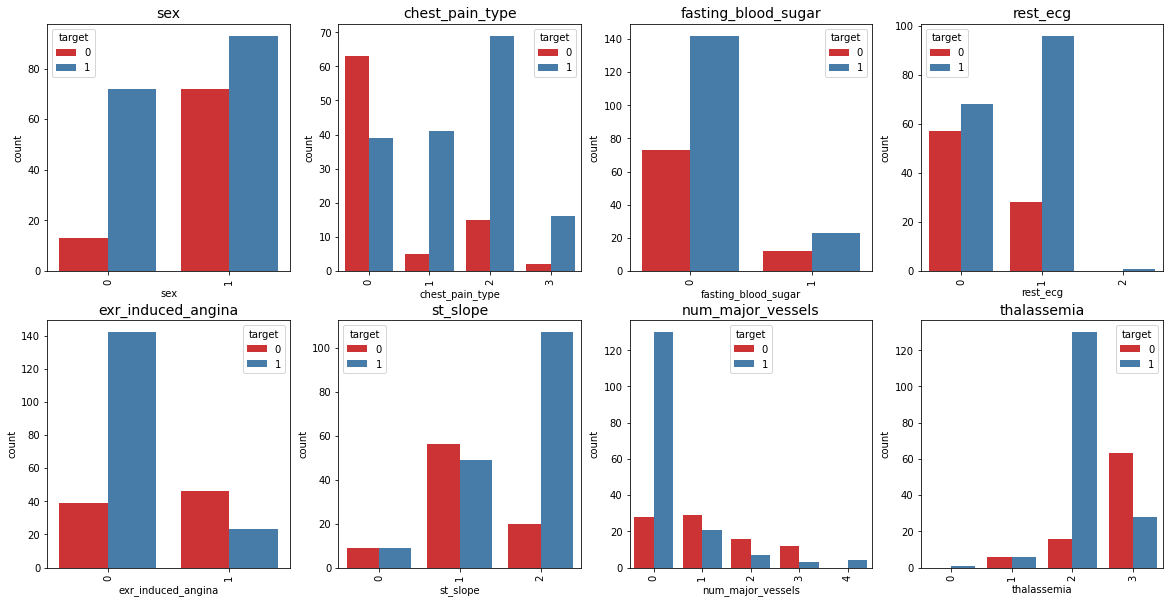

In [57]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cat_vars):
    plt.subplot(2,4, i+1)
    sns.countplot(data = df_train, x = col, hue = 'target', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

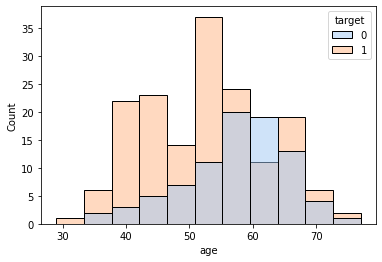

In [58]:
#Q1. Does the age of a person contribute towards heart attack?
sns.histplot(data = df_train, x = 'age', hue = 'target')

In [59]:
# Does the cholestrol level eventually contribute as a risk factor towards heart attack?
# Ans: cholestrol level in range of 200-300 are maximum prone to heart attack.

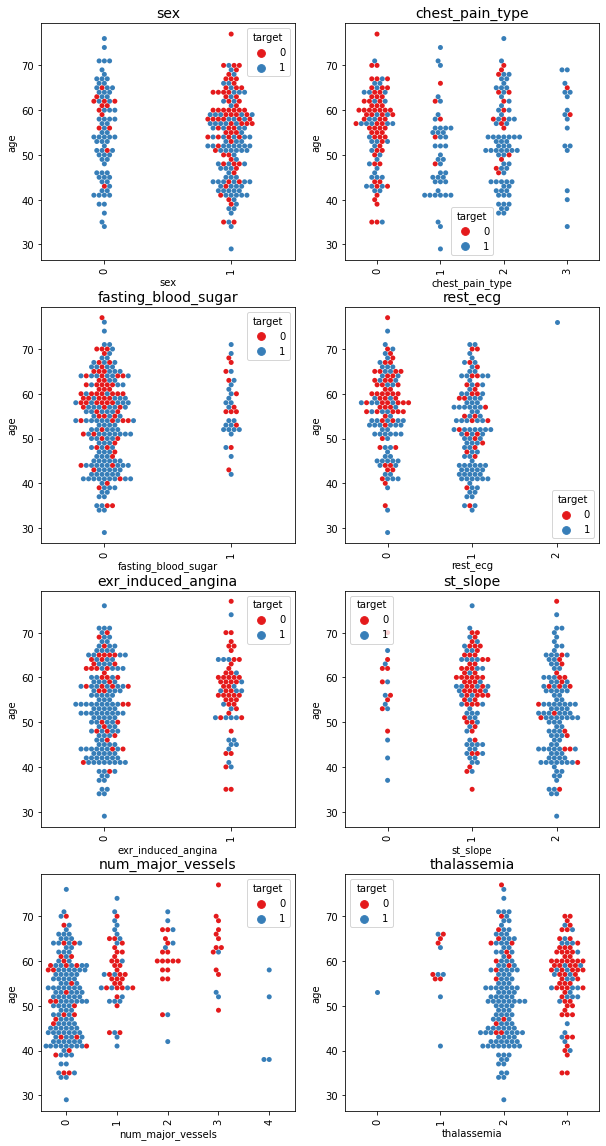

In [60]:
plt.figure(figsize=(10,20))
for i, col in enumerate(cat_vars):
    plt.subplot(4,2, i+1)
    sns.swarmplot(data = df_train, x = col, y = 'age', hue = 'target', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

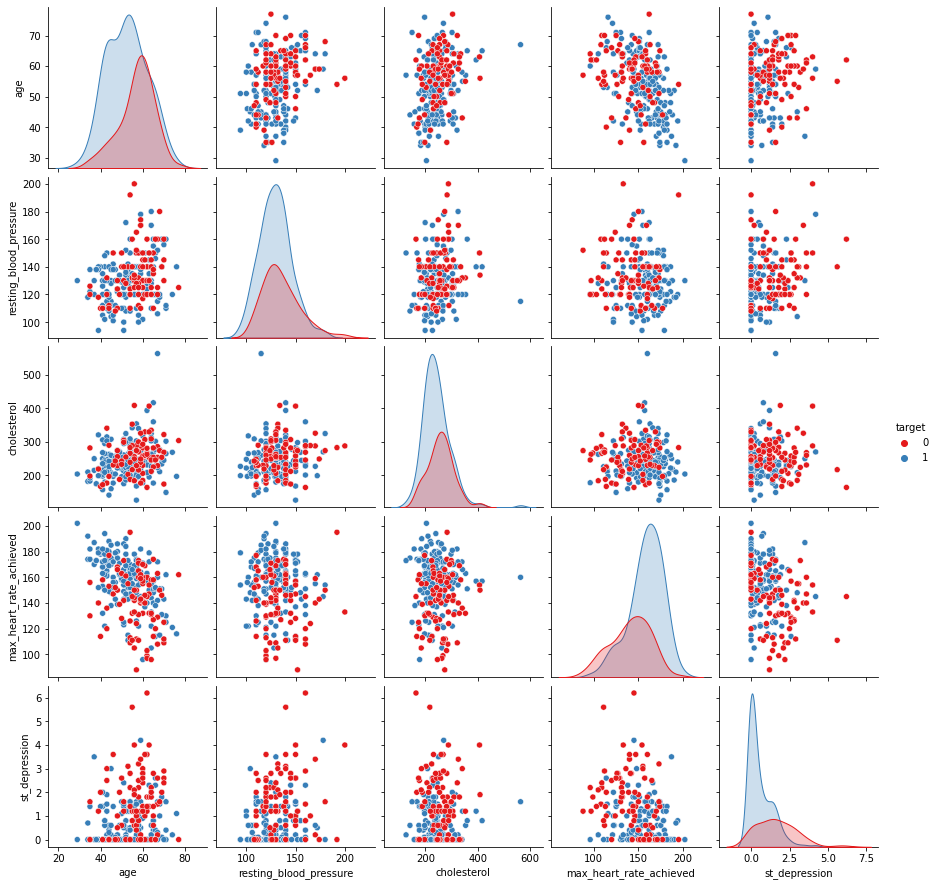

In [61]:
sns.pairplot(df_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','target']],hue = 'target',palette = 'Set1', diag_kind='kde')

<AxesSubplot:>

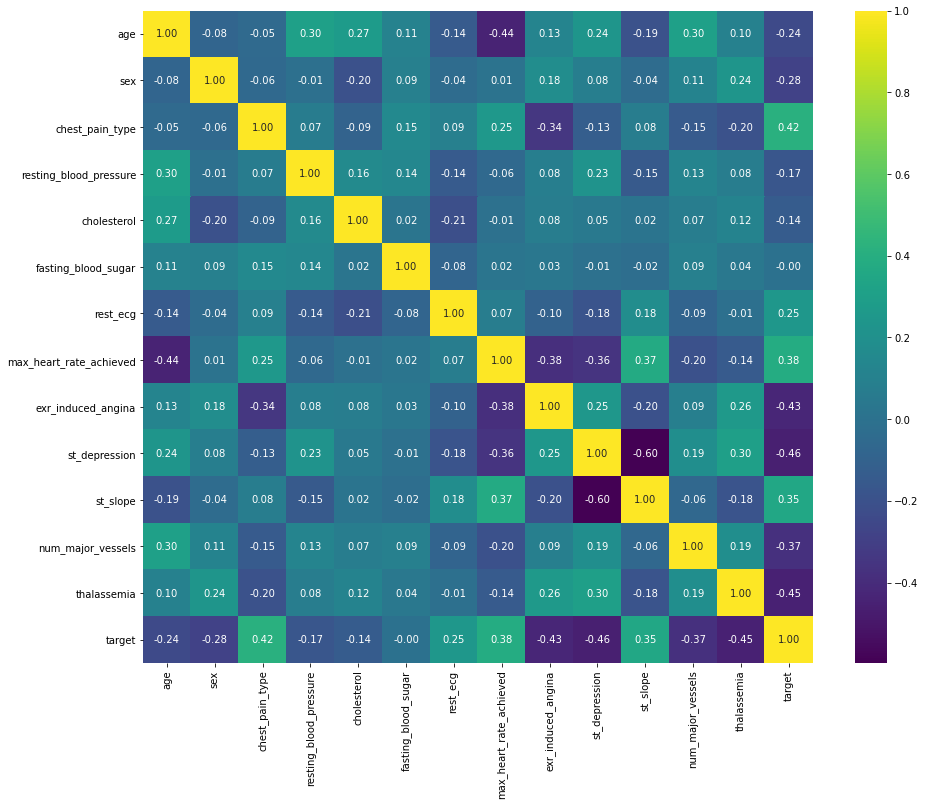

In [62]:
plt.figure(figsize = (15,12))
sns.heatmap(df_train.corr(), annot = True, fmt = '.2f', cmap = 'viridis', cbar = True)

<AxesSubplot:>

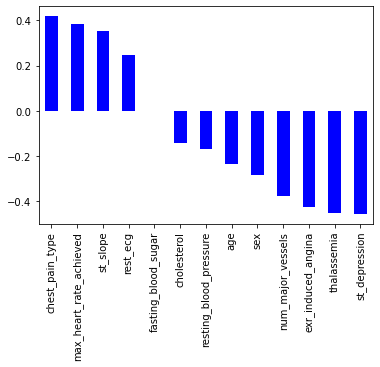

In [63]:
df_train.corr()['target'].sort_values(ascending = False)[1:].plot(kind = 'bar', lw = .4, color = 'blue')

In [80]:
df_train['cholesterol*max_heart_rate_achieved']=df_train['cholesterol']*df_train['max_heart_rate_achieved']/100
df_train['max_heart_rate_achieved*age']=df_train['max_heart_rate_achieved']*df_train['age']/100
df_train['resting_blood_pressure*chest_pain_type']=df_train['resting_blood_pressure']*df_train['chest_pain_type']/5
df_train['resting_blood_pressure*age']=df_train['resting_blood_pressure']*df_train['age']/100
df_train['resting_blood_pressure*cholesterol']=df_train['resting_blood_pressure']*df_train['cholesterol']/120

In [65]:
cat_var_new = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exr_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
num_vars_new = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression','cholesterol*max_heart_rate_achieved','max_heart_rate_achieved*age','resting_blood_pressure*chest_pain_type','resting_blood_pressure*age','resting_blood_pressure*cholesterol']

In [66]:
X = df_train.drop('target', axis = 1)
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((175, 18), (75, 18))

In [67]:
df_train.head(
    
)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exr_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,cholesterol*max_heart_rate_achieved,max_heart_rate_achieved*age,resting_blood_pressure*chest_pain_type,resting_blood_pressure*age,resting_blood_pressure*cholesterol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,349.50,94.50,87.0,91.35,337.85
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,467.50,69.19,52.0,48.10,325.00
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,350.88,70.52,26.0,53.30,265.20
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,420.08,99.68,24.0,67.20,283.20
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,577.02,92.91,0.0,68.40,424.80


# Pipeline  for preprocess

In [83]:
# QuantileTransformer, RobustScaler

num_4_Models = pipeline.Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('Normalizer',Normalizer(norm='l2'))
])
cat_4_Models = pipeline.Pipeline(steps=[
  ('onehot', OneHotEncoder( handle_unknown='error'))
])

preprocessor = compose.ColumnTransformer(transformers=[
    ('num', num_4_Models, num_vars_new),
    ('cat', cat_4_Models, cat_var_new),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scalar', StandardScaler()),
                                                 ('Normalizer', Normalizer())]),
                                 ['age', 'resting_blood_pressure',
                                  'cholesterol', 'max_heart_rate_achieved',
                                  'st_depression',
                                  'cholesterol*max_heart_rate_achieved',
                                  'max_heart_rate_achieved*age',
                                  'resting_blood_pressure*chest_pain_type',
                                  'resting_blood_pressure*age',
                                  'resting_blood_pressure*cholesterol']),
                                ('cat',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['sex', 'chest_pain_type',
                                  'fasting_blood_sugar', 'rest_ecg',
                                  'exr_induced_angina', 'st_slope',
                                  'num_major_vessels', 'thalassemia'])])

# Models

In [69]:
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
classifier_models = {
'SVC':SVC(),
'SGDClassifier':SGDClassifier(),
'DecisionTreeClassifier':DecisionTreeClassifier(),
'LinearSVC':LinearSVC(),
'KNeighborsClassifier':KNeighborsClassifier(8),
'LogisticRegression':LogisticRegression(random_state=9), 
"RandomForestClassifier":ensemble.RandomForestClassifier(),
"GradientBoostingClassifier":ensemble.GradientBoostingClassifier(),
}
# make pipline with  preprocessing 
classifier_models = {name: pipeline.make_pipeline(preprocessor, model) for name, model in classifier_models.items()}
classifier_models["GradientBoostingClassifier"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholesterol',
                                                   'max_heart_rate_achieved',
                                                   'st_depression',
                                                   'cholesterol*max_heart_rate_achieved',
                                                   'max_heart_rate_achieved*age',
                                                   'resting_blood_pressure*chest_pain_type',
                                                   'resting_blood_pressure*age',
                                                   'resting_blood_pressure*cholesterol']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'chest_pain_type',
                                                   'fasting_blood_sugar',
                                                   'rest_ecg',
                                                   'exr_induced_angina',
                                                   'st_slope',
                                                   'num_major_vessels',
                                                   'thalassemia'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [84]:

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [],'Time': []})
for model_name, model in classifier_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
    valid_pred = model.predict(X_test)
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, valid_pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, valid_pred)*100,
                    
                              "Time":     total_time},
                              ignore_index=True)
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,LogisticRegression,89.333333,89.000000,0.091105
2,SVC,86.666667,84.000000,0.026561
3,DecisionTreeClassifier,85.333333,86.000000,0.012281
4,LinearSVC,85.333333,86.000000,0.023534
5,RandomForestClassifier,84.000000,81.000000,0.229990
6,GradientBoostingClassifier,84.000000,82.000000,0.139656
7,SGDClassifier,82.666667,82.000000,0.019717
8,KNeighborsClassifier,82.666667,79.000000,0.010887


In [85]:
from sklearn.metrics import classification_report,confusion_matrix
#with the best  paramaters
classifier=LogisticRegression()
tuning_model=Pipeline(steps=[('preprocessor', preprocessor),('classifier',classifier )])
tuning_model.fit(X_train,y_train)
pred=tuning_model.predict(X_test)
print("model score: %.3f" % tuning_model.score(X_test, y_test))
print(classification_report(y_test, pred))
print()
print(confusion_matrix(y_test, pred))

model score: 0.920
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.96      0.92      0.94        50

    accuracy                           0.92        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.92      0.92      0.92        75


[[23  2]
 [ 4 46]]


In [72]:
param_grid = { 
    'classifier__n_estimators': [100,150,200],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8,9,10],
   }# 'classifier__criterion' :['friedman_mse','mse']
from sklearn.model_selection import GridSearchCV
test = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ensemble.GradientBoostingClassifier())])
CV = GridSearchCV(test,param_grid,  n_jobs= 1)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
nan


Accuracy score: 81.33 %


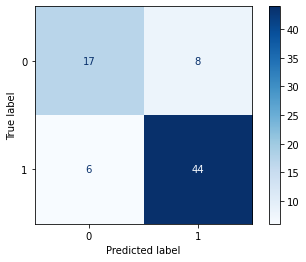

In [73]:

print(f'Accuracy score: {round(accuracy_score(y_test, pred) * 100, 2)} %')
plot_confusion_matrix(tuning_model, X_test, y_test, cmap=plt.cm.Blues)

In [74]:
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'Y_train' is not defined

In [ ]:
import pickle as pkl
pkl.dump(model,open("model.p","wb"))

In [ ]:
# Augmenting

import statistics
  
# Creating a sample of data
sample = [2.74, 1.23, 2.63, 2.22, 3, 1.98]
  
# Prints variance of the sample set
  
# Function will automatically calculate
# it's mean and set it as xbar
print("Variance of sample set is % s" 
      %(statistics.variance(sample)))

df

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cd775439-f3d2-4e6d-9916-a56701a1b233' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>